# Modelos TFG 

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler, OneHotEncoder



In [285]:
df_modelos = pd.read_csv("../data/datosFinales/df_modelos.csv", sep = ";")
# drop columns from df_modelos which end with _1
df_modelos = df_modelos.loc[:, ~df_modelos.columns.str.contains('diferencia', case=False)]
categoricas = pd.read_csv("../data/categoricas.csv", sep = ",").squeeze().tolist()
print(len(categoricas))
#pop from categoricas 'tipo_plastia' and 'via_asc_plastia'
categoricas.remove('tipo_plastia')
categoricas.remove('via_asc_plastia')
print(len(categoricas))

30
28


In [286]:
df_modelos.shape

(728, 141)

In [287]:
#fija el random state de todo el documento para todas las ejecuciones
np.random.seed(14)

In [288]:
#df_modelos = df_modelos.loc[:, ~df_modelos.columns.str.endswith('_5')]
#df_modelos = df_modelos.loc[:, ~df_modelos.columns.str.endswith('_4')]
#df_modelos = df_modelos.loc[:, ~df_modelos.columns.str.endswith('_3')]

df_modelos

,id_registro,sexo,edad,peso,talla,imc,neoadyuvancia,localizacion,tipo_histologico,ct,...,temp_corp_5,pcr_5,plaquetas_5,leucocitos_5,tad_5,tas_5,creatinina_5,frec_resp_5,eva_5,frec_card_5
0,92-1,0.0,61.0,79.0,178.0,24.9,1.0,4.0,1.0,4.0,...,36.4,192.40,12.083911,8.625330,75.0,110.0,0.65,23.0,4.0,NaN
1,92-2,1.0,79.0,95.0,170.0,32.9,0.0,4.0,1.0,2.0,...,35.7,134.00,12.175619,9.093919,NaN,149.0,0.88,15.0,1.0,99.0
2,92-3,0.0,74.0,94.0,175.0,30.7,1.0,4.0,NaN,4.0,...,36.0,240.00,11.751950,8.682877,78.0,186.0,0.76,23.0,4.0,82.0
3,92-4,0.0,74.0,63.0,168.0,22.3,2.0,3.0,1.0,5.0,...,37.5,NaN,NaN,NaN,35.0,90.0,NaN,24.0,7.0,120.0
4,92-5,0.0,62.0,57.0,157.0,23.1,2.0,4.0,1.0,4.0,...,36.0,249.00,12.464587,8.965845,56.0,102.0,0.32,18.0,2.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,613-30,0.0,72.0,83.0,169.0,29.1,1.0,3.0,1.0,3.0,...,37.5,32.80,12.185875,9.787010,60.0,104.0,0.79,28.0,3.0,91.0
724,613-31,1.0,40.0,58.0,160.0,22.7,0.0,5.0,1.0,3.0,...,37.0,16.94,12.417148,8.691315,67.0,112.0,0.43,22.0,2.0,77.0
725,613-32,0.0,59.0,82.0,171.0,28.0,1.0,7.0,1.0,2.0,...,35.3,2.16,12.842652,8.925454,56.0,110.0,0.63,19.0,0.0,56.0
726,617-1,0.0,74.0,53.0,160.0,20.7,0.0,6.0,2.0,2.0,...,36.6,98.00,11.925042,8.140607,67.0,108.0,0.60,13.0,3.0,67.0


In [289]:
df_modelos.tipo_cirugia

0      4.0
1      7.0
2      0.0
3      0.0
4      0.0
      ... 
723    3.0
724    5.0
725    6.0
726    6.0
727    1.0
Name: tipo_cirugia, Length: 728, dtype: float64

In [290]:
for col in df_modelos.columns:
    print(col)

id_registro
sexo
edad
peso
talla
imc
neoadyuvancia
localizacion
tipo_histologico
ct
cn
cm
ecog
asa
dm
hta
cardiopatia
nefropatia
alcohol
fumador
neumopatia
enf_vasc_cer
enf_art_peri
demencia
esteroides
datos_basales_complete
vol_diuresis_dia
hemoglobina
perioperatorio_complete
acondicionamienio
tipo_cirugia
abordaje
perdida_sang
anastomosis
tipo_anastomosis
piloro
icg
intervencin_complete
fuga
proteinas_0
quick_0
linfocitos_0
sat_oxig_0
albumina_0
il6_0
neutrofilos_0
temp_corp_0
pcr_0
plaquetas_0
leucocitos_0
tad_0
tas_0
creatinina_0
frec_resp_0
eva_0
frec_card_0
proteinas_1
quick_1
linfocitos_1
sat_oxig_1
albumina_1
il6_1
neutrofilos_1
temp_corp_1
pcr_1
plaquetas_1
leucocitos_1
tad_1
tas_1
creatinina_1
frec_resp_1
eva_1
frec_card_1
proteinas_2
quick_2
linfocitos_2
sat_oxig_2
albumina_2
il6_2
neutrofilos_2
temp_corp_2
pcr_2
plaquetas_2
leucocitos_2
tad_2
tas_2
creatinina_2
frec_resp_2
eva_2
frec_card_2
proteinas_3
quick_3
linfocitos_3
sat_oxig_3
albumina_3
il6_3
neutrofilos_3
temp_corp

## Modelos

In [291]:
from sklearn.svm import SVC
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, 
                           confusion_matrix, 
                           accuracy_score,
                           roc_auc_score,
                           f1_score)
from sklearn.preprocessing import LabelEncoder





In [292]:
df_tmp = df_modelos.copy().drop('id_registro', axis=1, errors='ignore')
df_tmp = df_tmp.copy()[df_modelos['fuga'] != -1]

# encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# # Ajustar y transformar las columnas categóricas
# X_cat_encoded = encoder.fit_transform(df_tmp[categoricas])

# # Crear DataFrame con los nuevos nombres de columnas
# cat_encoded_df = pd.DataFrame(
#     X_cat_encoded,
#     columns=encoder.get_feature_names_out(categoricas),
#     index=df_tmp.index  # mantener los índices originales
# )

# # Concatenar con el resto de columnas no categóricas
# X_encoded = pd.concat([df_tmp.drop(columns=categoricas), cat_encoded_df], axis=1).drop(columns='fuga')
y = df_tmp['fuga']
X = df_tmp.drop(columns='fuga')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=14)

In [293]:
# modelo_hgb = HistGradientBoostingClassifier(
#     max_iter=1000,           # Número de árboles (iteraciones)
#     learning_rate=0.2,      # Tasa de aprendizaje
#     max_depth=6,            # Profundidad máxima de los árboles
#     categorical_features=categoricas,  # Especificar columnas categóricas
#     early_stopping=True,    # Parada temprana si no mejora
#     scoring='roc_auc'      # Métrica para early stopping
# )

#gridsearch l2regularization, learning_rate, class_weight (balance) 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import LeaveOneOut


# param_grid = {
#     'max_iter': [100],
#     'learning_rate': [0.5, 0.8, 0.9, 1],
#     'max_depth': [1, 2],
#     'min_samples_leaf': [1, 2, 3, 4],
#     'early_stopping': [True],
#     'l2_regularization': [0.6, 0.7, 0.8, 1],
#     'class_weight': ['balanced', None]
# }
# modelo_hgb = HistGradientBoostingClassifier(random_state=14)
# # Use RandomizedSearchCV for a more efficient search
# grid_search = RandomizedSearchCV(modelo_hgb, param_grid, cv=LeaveOneOut(), n_jobs=-1)
# grid_search.fit(X_train, y_train)


In [294]:
#best hiperparameters
# print("Mejores hiperparámetros:")
# print("max_iter: 1000")
# print("learning_rate: ", grid_search.best_params_['learning_rate'])
# print("max_depth: ", grid_search.best_params_['max_depth'])
# print("min_samples_leaf: ", grid_search.best_params_['min_samples_leaf'])
# print("early_stopping: ", grid_search.best_params_['early_stopping'])
# print("l2_regularization: ", grid_search.best_params_['l2_regularization'])
# print("class_weight: ", grid_search.best_params_['class_weight'])
# print("Mejor puntuación:")
# print(grid_search.best_score_)


In [295]:
from sklearn.metrics import f1_score

#create a model with the best hyperparameters
modelo_hgb = HistGradientBoostingClassifier(
    random_state=13
)

modelo_hgb.fit(X_train, y_train)

y_pred_train = modelo_hgb.predict(X_train)
y_proba_train = modelo_hgb.predict_proba(X_train)[:, 1] 

y_pred = modelo_hgb.predict(X_test)
y_proba = modelo_hgb.predict_proba(X_test)[:, 1] 

print("Matriz de confusión con train")
print(confusion_matrix(y_train, y_pred_train))
print("Reporte de clasificación:")
print(classification_report(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("AUC:", roc_auc_score(y_train, y_proba_train))
#f1-score

f1_train = f1_score(y_train, y_pred_train)
print("F1 score (train):", f1_train)



print("\n\nMatriz de confusión con test")
print(confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))
f1_test = f1_score(y_test, y_pred)
print("F1 score (test):", f1_test)

Matriz de confusión con train
[[382   0]
 [  0  92]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       382
           1       1.00      1.00      1.00        92

    accuracy                           1.00       474
   macro avg       1.00      1.00      1.00       474
weighted avg       1.00      1.00      1.00       474

Accuracy: 1.0
AUC: 1.0
F1 score (train): 1.0


Matriz de confusión con test
[[156   9]
 [ 30   9]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       165
           1       0.50      0.23      0.32        39

    accuracy                           0.81       204
   macro avg       0.67      0.59      0.60       204
weighted avg       0.77      0.81      0.78       204

Accuracy: 0.8088235294117647
AUC: 0.7213675213675215
F1 score (test): 0.3157894736842105


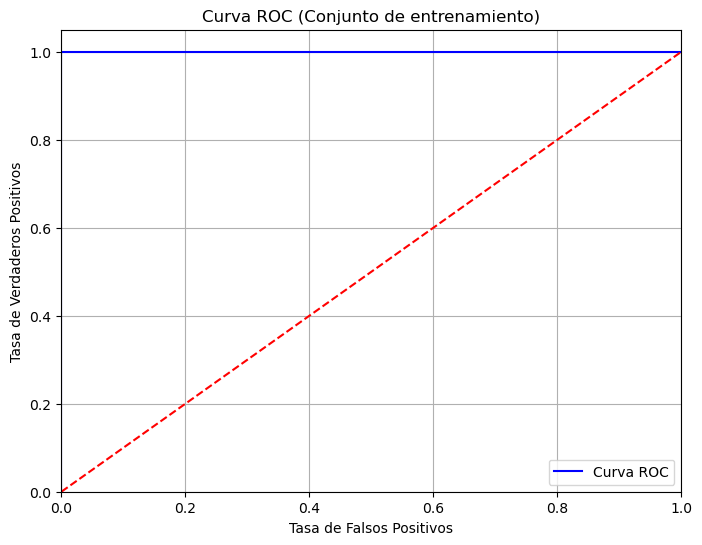

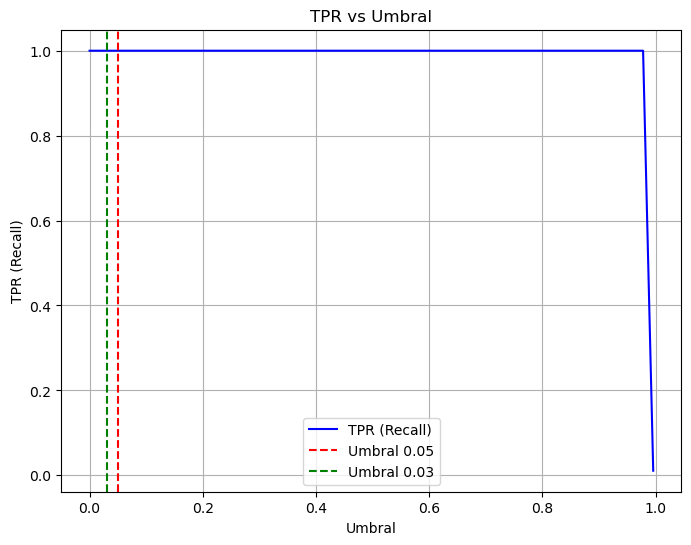

In [296]:
#show the roc curve for the model "modelo_hgb"
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_proba_train, pos_label=1)
#graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (Conjunto de entrenamiento)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# dibuja el fpr vs el umbral
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='TPR (Recall)', color='blue')
plt.xlabel('Umbral')
plt.ylabel('TPR (Recall)')
plt.title('TPR vs Umbral')
plt.axvline(x=0.05, color='red', linestyle='--', label='Umbral 0.05')
plt.axvline(x=0.03, color='green', linestyle='--', label='Umbral 0.03')
plt.legend()
plt.grid()
plt.show()



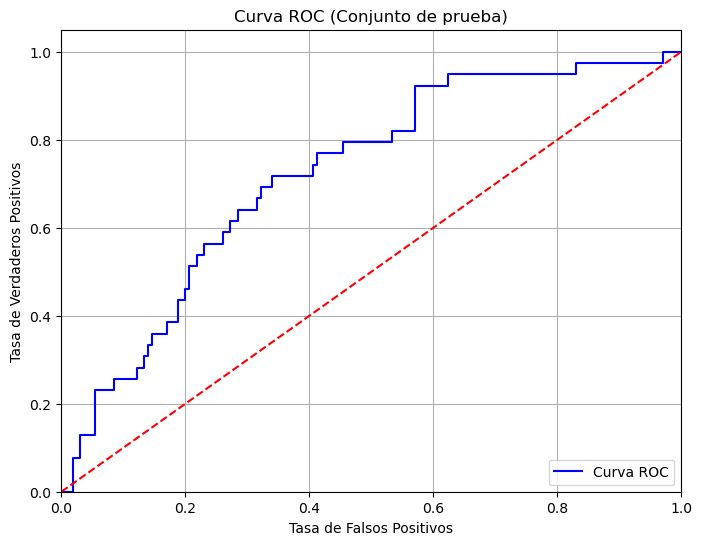

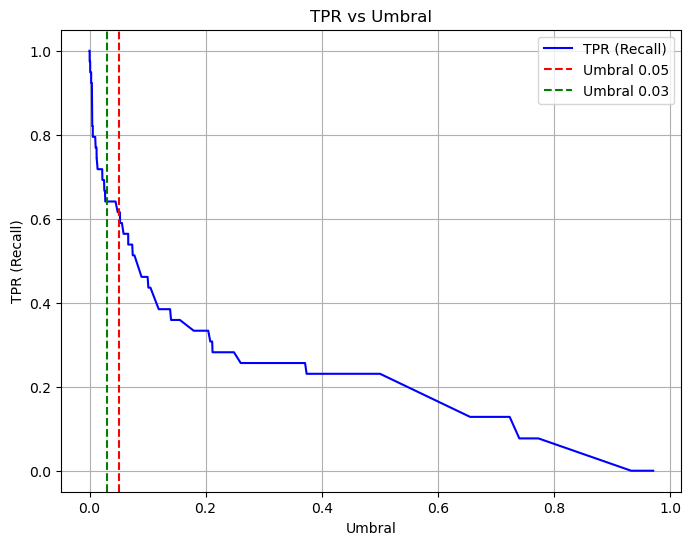

In [297]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba, pos_label=1)
#graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (Conjunto de prueba)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# dibuja el fpr vs el umbral
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='TPR (Recall)', color='blue')
plt.xlabel('Umbral')
plt.ylabel('TPR (Recall)')
plt.title('TPR vs Umbral')
plt.axvline(x=0.05, color='red', linestyle='--', label='Umbral 0.05')
plt.axvline(x=0.03, color='green', linestyle='--', label='Umbral 0.03')
plt.legend()
plt.grid()
plt.show()



In [298]:
modelo_hgb

HistGradientBoostingClassifier(random_state=13)

In [299]:
# grid search
# modelo con selection 
# busqueda del modelo, punto vista modelo y medico



In [283]:
import dalex as dx

exp = dx.Explainer(modelo_hgb, X, y)
vi = exp.model_parts()
vi.plot(max_vars=20)
#select the 10 most important variables from the explainer
imps = vi.result['variable'][-30:-1].tolist()

Preparation of a new explainer is initiated

  -> data              : 678 rows 139 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 678 values
  -> model_class       : sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x14f7dd1b0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 5.09e-05, mean = 0.17, max = 0.996
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.971, mean = 0.0232, max = 1.0
  -> model_info        : package sklearn

A new explainer has been created!


KeyboardInterrupt: 

In [238]:
for im in imps:
    if im not in X.columns:
        imps.remove(im)

imps


['perdida_sang',
 'tipo_cirugia',
 'sat_oxig_0',
 'frec_resp_1',
 'talla',
 'edad',
 'eva_2',
 'temp_corp_2',
 'leucocitos_2',
 'creatinina_1',
 'linfocitos_2',
 'frec_resp_2',
 'temp_corp_0',
 'tad_2',
 'il6_0',
 'plaquetas_2',
 'hemoglobina',
 'quick_1',
 'proteinas_0',
 'cardiopatia',
 'frec_card_1',
 'linfocitos_1',
 'frec_resp_0',
 'neutrofilos_2',
 'pcr_1',
 'il6_2',
 'pcr_0',
 'pcr_2',
 'localizacion']

In [239]:
# Filter the `imps` list to include only columns that exist in `df_modelos`
df_tmp = df_tmp.copy()[df_modelos['fuga'] != -1]
df_imps = df_tmp[imps]
y = df_tmp['fuga']

#save as a dataframe the csv: data/datosFinales/df_dalex.csv
df_dalex = pd.read_csv("../data/datosFinales/df_dalex.csv", sep = ";")
df_dalex['id_registro'] = df_modelos['id_registro']


/var/folders/ks/d2yzlrt17d5_l6z5hvk3zgkr0000gn/T/ipykernel_42884/2854639510.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [240]:
#quita de categoricas las variables que no estan en df_sel
categoricas2 = [col for col in categoricas if col in df_imps.columns]

In [241]:
X_train, X_test, y_train, y_test = train_test_split(df_imps, y, test_size=0.3, stratify=y, random_state=14)

In [242]:

#create a model with the best hyperparameters
modelo_hgb = HistGradientBoostingClassifier(
    random_state=14
)
modelo_hgb.fit(X_train, y_train)
y_pred_train = modelo_hgb.predict(X_train)
y_proba_train = modelo_hgb.predict_proba(X_train)[:, 1]
y_pred = modelo_hgb.predict(X_test)
y_proba = modelo_hgb.predict_proba(X_test)[:, 1]

print("Matriz de confusión con train")
print(confusion_matrix(y_train, y_pred_train))
print("Reporte de clasificación:")
print(classification_report(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("AUC:", roc_auc_score(y_train, y_proba_train))
print("\n\nMatriz de confusión con test")
print(confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))



Matriz de confusión con train
[[382   0]
 [  0  92]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       382
           1       1.00      1.00      1.00        92

    accuracy                           1.00       474
   macro avg       1.00      1.00      1.00       474
weighted avg       1.00      1.00      1.00       474

Accuracy: 1.0
AUC: 1.0


Matriz de confusión con test
[[156   9]
 [ 34   5]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       165
           1       0.36      0.13      0.19        39

    accuracy                           0.79       204
   macro avg       0.59      0.54      0.53       204
weighted avg       0.73      0.79      0.75       204

Accuracy: 0.7892156862745098
AUC: 0.7642579642579643


In [243]:
#calcula el f1 score del modelo
from sklearn.metrics import f1_score
f1_train = f1_score(y_train, y_pred_train)
print("F1 score:", f1_train)
f1_test = f1_score(y_test, y_pred)
print("F1 score:", f1_test)

F1 score: 1.0
F1 score: 0.18867924528301888


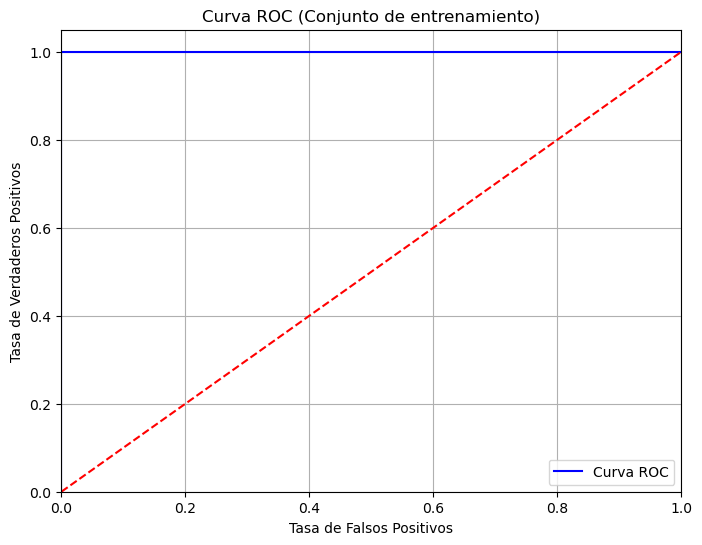

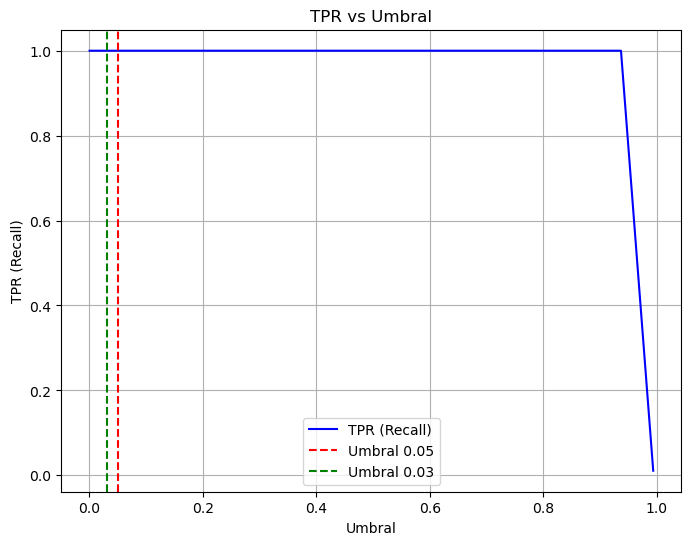

In [244]:
#show the roc curve for the model "modelo_hgb"
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_proba_train, pos_label=1)
#graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (Conjunto de entrenamiento)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# dibuja el fpr vs el umbral
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='TPR (Recall)', color='blue')
plt.xlabel('Umbral')
plt.ylabel('TPR (Recall)')
plt.title('TPR vs Umbral')
plt.axvline(x=0.05, color='red', linestyle='--', label='Umbral 0.05')
plt.axvline(x=0.03, color='green', linestyle='--', label='Umbral 0.03')
plt.legend()
plt.grid()
plt.show()



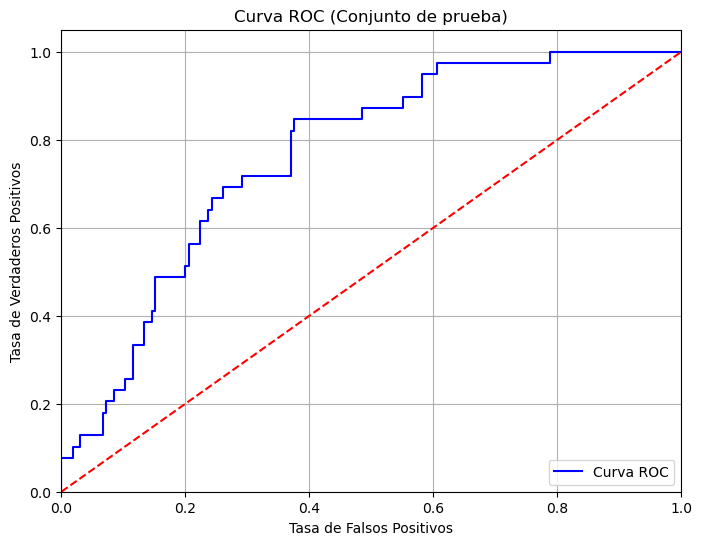

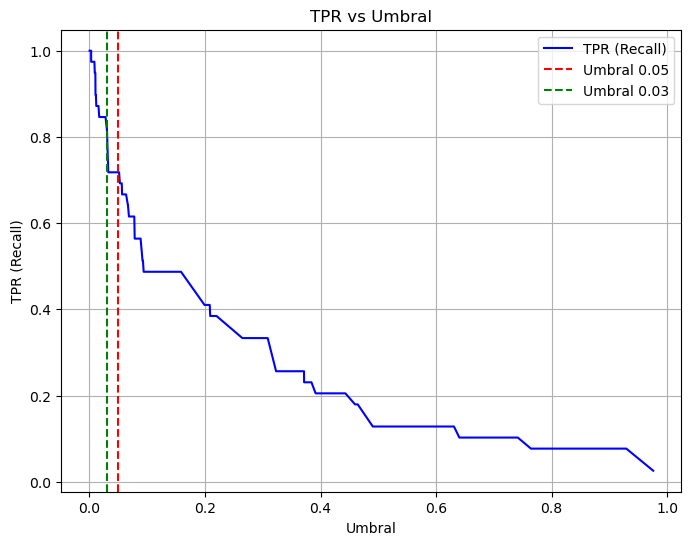

In [245]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba, pos_label=1)
#graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (Conjunto de prueba)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# dibuja el fpr vs el umbral
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='TPR (Recall)', color='blue')
plt.xlabel('Umbral')
plt.ylabel('TPR (Recall)')
plt.title('TPR vs Umbral')
plt.axvline(x=0.05, color='red', linestyle='--', label='Umbral 0.05')
plt.axvline(x=0.03, color='green', linestyle='--', label='Umbral 0.03')
plt.legend()
plt.grid()
plt.show()



In [246]:
import dalex as dx

exp = dx.Explainer(modelo_hgb, df_imps, y)
vi = exp.model_parts()
vi.plot(max_vars=20)
#select the 10 most important variables from the explainer
imps = vi.result['variable'][-20:-1].tolist()

Preparation of a new explainer is initiated

  -> data              : 678 rows 29 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 678 values
  -> model_class       : sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x14f7dd1b0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.000164, mean = 0.171, max = 0.994
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.861, mean = 0.0219, max = 0.997
  -> model_info        : package sklearn

A new explainer has been created!


Umbral óptimo ROC: 0.0559
Umbral óptimo según F1-score: 0.9294


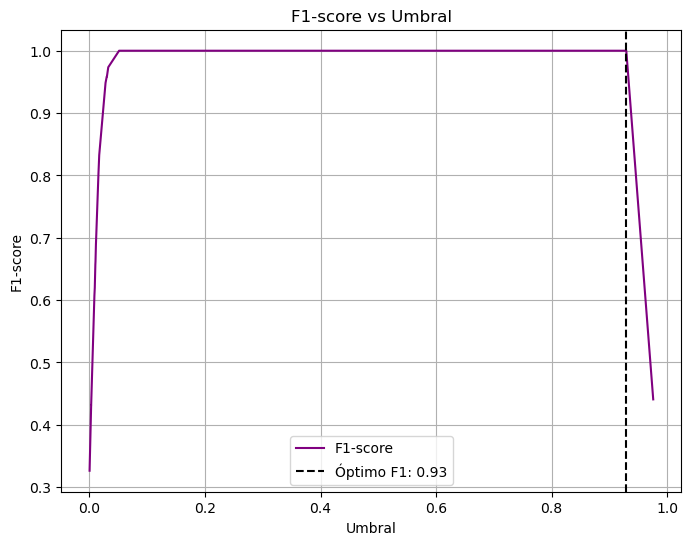

In [247]:
# Criterio: minimizar distancia al punto perfecto (0,1)
distancias = np.sqrt((1 - tpr)**2 + fpr**2)
umbral_optimo = thresholds[np.argmin(distancias)]
print(f"Umbral óptimo ROC: {umbral_optimo:.4f}")

f1_scores = [f1_score(y_train, y_proba_train > thr) for thr in thresholds]
umbral_f1 = thresholds[np.argmax(f1_scores)]
print(f"Umbral óptimo según F1-score: {umbral_f1:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, label='F1-score', color='purple')
plt.axvline(x=umbral_f1, color='black', linestyle='--', label=f'Óptimo F1: {umbral_f1:.2f}')
plt.xlabel('Umbral')
plt.ylabel('F1-score')
plt.title('F1-score vs Umbral')
plt.legend()
plt.grid()
plt.show()


In [248]:
confusion_matrix(y_train, y_proba_train>0.1)

array([[382,   0],
       [  0,  92]])

In [249]:
confusion_matrix(y_test, y_proba>umbral_optimo)

array([[122,  43],
       [ 13,  26]])

In [250]:
#matriz de confusion con umbral optimo y f1score

# Matriz de confusión con umbral óptimo (ROC)
print("Matriz de confusión (test, umbral óptimo ROC):")
print(confusion_matrix(y_test, y_proba > umbral_optimo))

# Matriz de confusión con umbral óptimo según F1-score
print("\nMatriz de confusión (test, umbral óptimo F1-score):")
print(confusion_matrix(y_test, y_proba > umbral_f1))


Matriz de confusión (test, umbral óptimo ROC):
[[122  43]
 [ 13  26]]

Matriz de confusión (test, umbral óptimo F1-score):
[[165   0]
 [ 37   2]]


In [251]:
#matriz de confusion con umbral optimo y f1score

# Matriz de confusión con umbral óptimo (ROC)
print("Matriz de confusión (test, umbral óptimo ROC):")
print(confusion_matrix(y_test, y_proba > 0.05))

# Matriz de confusión con umbral óptimo según F1-score
print("\nMatriz de confusión (test, umbral óptimo F1-score):")
print(confusion_matrix(y_test, y_proba > 0.05))

Matriz de confusión (test, umbral óptimo ROC):
[[117  48]
 [ 11  28]]

Matriz de confusión (test, umbral óptimo F1-score):
[[117  48]
 [ 11  28]]


In [252]:
#F1 score con nuevos umbrales

from sklearn.metrics import f1_score

# F1 score usando el umbral óptimo ROC
f1_test_optimo = f1_score(y_test, y_proba > umbral_optimo)
print(f"F1 score (test, umbral óptimo ROC): {f1_test_optimo:.4f}")

# F1 score usando el umbral óptimo F1-score
f1_test_f1 = f1_score(y_test, y_proba > 0.05)
print(f"F1 score (test, umbral óptimo F1-score): {f1_test_f1:.4f}")

F1 score (test, umbral óptimo ROC): 0.4815
F1 score (test, umbral óptimo F1-score): 0.4870
